**Fake vs True News Classification Project**

*By Mohammed Faisal Khan*



**Why should you care about whether or not your news is real or fake?**

- The spread of fake news has become easier in the digital age, as social media platforms and other online channels allow anyone to create and share content with the world. The problem with fake news is that it can be very convincing, and people may believe it to be true without questioning its authenticity. This can lead to a range of negative consequences, That is why a sophisticated method is required to identify fake news



**Problem Statement**


*   Given - A Data Set of Fake and Real news.
*   Objective - To develop a solution which detects if a given news is Fake or Real.
*   Methodology used - We try to pose the problem as a text classification problem and build a deep learning model for achieving the objective.


**Goal**
- The Goal of This notebook is to use Machine Learning, Deep Learning and NLP to Detect Fake News

# Step-1:- Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, SimpleRNN
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


# Step-2 : Loading and Cleaning Data

In [2]:
# 2.1 Import Data
df = pd.read_csv('news.csv',error_bad_lines=False,engine='python')
df

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,fake
...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,true
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",true
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,true
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,true


In [3]:
# 2.2 Inspect the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   44898 non-null  object
 1   text    44898 non-null  object
 2   label   44898 non-null  object
dtypes: object(3)
memory usage: 1.0+ MB




*   After Inspecting we can see there are 44898 rows and 3 columns



In [4]:
# The df.isna()/isnull() code gives the counts of missing values
df.isna().sum()

title    0
text     0
label    0
dtype: int64



*   We can see there is no null values in the dataset



In [5]:
df['label'].value_counts(normalize=True)

fake    0.522985
true    0.477015
Name: label, dtype: float64



**The Percentage of True and Fake News articles:**

- True:- 48%
- Fake:- 52%


In [6]:
df['label'].replace({'true':1,'fake':0},inplace=True)
df.head()

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0


Text(0.5, 1.0, 'Distribution of Fake/True News')

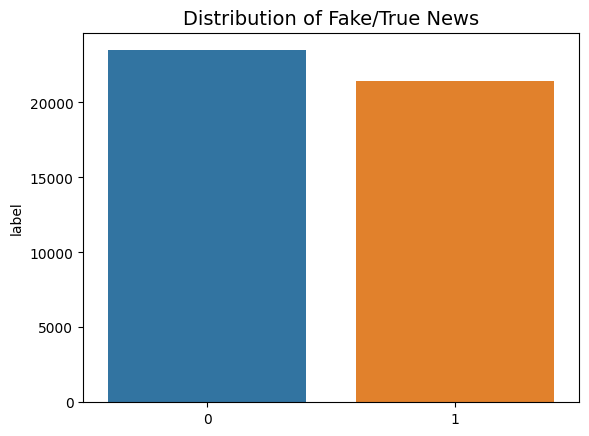

In [7]:
class_names = ['fake','true']
l_count = df['label'].value_counts()
sns.barplot(x=l_count.index, y=l_count)
plt.title('Distribution of Fake/True News',fontsize =14)

-  Data Visualization of all News Titles

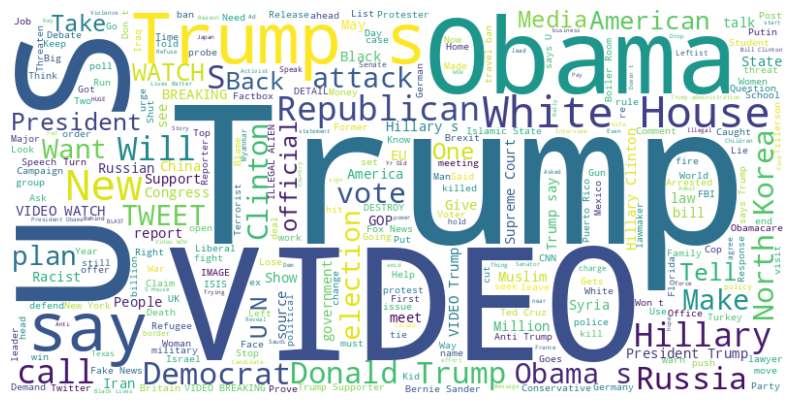

In [8]:
from wordcloud import WordCloud
titles = ' '.join(title for title in df['title'])
wordcloud = WordCloud(
    background_color='white',
    max_words=300,
    width=800,
    height=400,
).generate(titles)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Many of available news articles are about elections and presidents of USA**

In [9]:
def clean_text(msg):
  token = word_tokenize(msg.lower())
  ftoken = [i for i in token if i.isalpha()]

  stop = stopwords.words('english')
  stoken = [i for i in ftoken if i not in stop]

  lemma = WordNetLemmatizer()
  ltoken = [lemma.lemmatize(i) for i in stoken]

  return ' '.join(ltoken)

In [10]:
#Converting data type of 'title' column into string type
df['title']=df['title'].astype(str)

In [11]:
df['clean_msg'] = df['title'].apply(clean_text)

In [12]:
df.head()

,title,text,label,clean_msg
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0,donald trump sends embarrassing new year eve m...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0,drunk bragging trump staffer started russian c...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0,sheriff david clarke becomes internet joke thr...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0,trump obsessed even obama name coded website i...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0,pope francis called donald trump christmas speech


#Step 3:-Data Preprocessing

In [13]:
#spliting data into x and y
x = df['clean_msg']
y = df['label']

In [14]:
y

0        0
1        0
2        0
3        0
4        0
        ..
44893    1
44894    1
44895    1
44896    1
44897    1
Name: label, Length: 44898, dtype: int64

In [15]:
# Spliting the dataset into 70% and 30% for train and test respectively
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(min_df=0.02)
xtrain = cvec.fit_transform(xtrain).toarray()
xtest = cvec.transform(xtest).toarray()

In [17]:
x

0        donald trump sends embarrassing new year eve m...
1        drunk bragging trump staffer started russian c...
2        sheriff david clarke becomes internet joke thr...
3        trump obsessed even obama name coded website i...
4        pope francis called donald trump christmas speech
                               ...                        
44893         committed nato back new approach afghanistan
44894       lexisnexis withdrew two product chinese market
44895                 minsk cultural hub becomes authority
44896    vatican upbeat possibility pope francis visiti...
44897              indonesia buy billion worth russian jet
Name: clean_msg, Length: 44898, dtype: object

In [18]:
df.head()

,title,text,label,clean_msg
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0,donald trump sends embarrassing new year eve m...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0,drunk bragging trump staffer started russian c...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0,sheriff david clarke becomes internet joke thr...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0,trump obsessed even obama name coded website i...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0,pope francis called donald trump christmas speech


In [19]:
empty = []
for indx,tl,txt,lbl,cm in df.itertuples():
  if type(cm)==str:
    if cm.isspace():
      empty.append(indx)
print(empty)

[]


In [20]:
xtrain

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [21]:
xtest

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]])

#Model 1:- ANN

In [22]:
# Building the 'Artificial Neural Network(ANN)'
ann = Sequential()
ann.add(Dense(units=32,activation='relu'))
ann.add(Dropout(rate=0.20))
ann.add(Dense(units=24,activation='relu'))
ann.add(Dropout(rate=0.20))
ann.add(Dense(units=12,activation='relu'))
ann.add(Dropout(rate=0.20))
ann.add(Dense(units=1,activation='sigmoid'))
ann.compile(optimizer='adam',loss='binary_crossentropy')
ann.fit(xtrain,ytrain,batch_size=50,epochs=50,validation_split=0.20)

Epoch 1/50
503/503 [==============================] - 3s 3ms/step - loss: 0.5243 - val_loss: 0.4450
Epoch 2/50
503/503 [==============================] - 1s 2ms/step - loss: 0.4584 - val_loss: 0.4414
Epoch 3/50
503/503 [==============================] - 1s 2ms/step - loss: 0.4510 - val_loss: 0.4377
Epoch 4/50
503/503 [==============================] - 1s 2ms/step - loss: 0.4475 - val_loss: 0.4347
Epoch 5/50
503/503 [==============================] - 1s 2ms/step - loss: 0.4448 - val_loss: 0.4373
Epoch 6/50
503/503 [==============================] - 2s 3ms/step - loss: 0.4437 - val_loss: 0.4326
Epoch 7/50
503/503 [==============================] - 2s 4ms/step - loss: 0.4425 - val_loss: 0.4333
Epoch 8/50
503/503 [==============================] - 1s 2ms/step - loss: 0.4430 - val_loss: 0.4317
Epoch 9/50
503/503 [==============================] - 1s 2ms/step - loss: 0.4416 - val_loss: 0.4335
Epoch 10/50
503/503 [==============================] - 1s 2ms/step - loss: 0.4394 - val_loss: 0.4330

#Evaluation

Let's evaluate the performance of the ANN on the test set and generate a classification report.

In [23]:
ypred = ann.predict(xtest)
ypred = ypred>0.5

421/421 [==============================] - 1s 2ms/step


In [24]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.93      0.62      0.74      7053
           1       0.69      0.95      0.80      6417

    accuracy                           0.77     13470
   macro avg       0.81      0.78      0.77     13470
weighted avg       0.82      0.77      0.77     13470



#Model 2:- LogisticRegression

In [25]:
# Building The 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred = logreg.predict(xtest)

#Evaluation

Let's evaluate the performance of the LogisticRegression on the test set and generate a classification report.

In [26]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.93      0.61      0.74      7053
           1       0.69      0.95      0.80      6417

    accuracy                           0.77     13470
   macro avg       0.81      0.78      0.77     13470
weighted avg       0.82      0.77      0.77     13470



In [27]:
df.head()

,title,text,label,clean_msg
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0,donald trump sends embarrassing new year eve m...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0,drunk bragging trump staffer started russian c...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0,sheriff david clarke becomes internet joke thr...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0,trump obsessed even obama name coded website i...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0,pope francis called donald trump christmas speech


In [28]:
#spliting data into x and y
x = df['clean_msg']
y = df['label']

In [29]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30,random_state=1)

In [30]:
sentlen = []
for i in df['clean_msg']:
  sentlen.append(len(word_tokenize(i)))

df['Sentlen'] = sentlen

In [31]:
df.head()

,title,text,label,clean_msg,Sentlen
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0,donald trump sends embarrassing new year eve m...,9
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0,drunk bragging trump staffer started russian c...,8
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0,sheriff david clarke becomes internet joke thr...,10
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0,trump obsessed even obama name coded website i...,8
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0,pope francis called donald trump christmas speech,7


In [32]:
max(sentlen)

26

In [33]:
min(sentlen)

1

In [34]:
np.quantile(sentlen,0.90)

12.0

In [35]:
max_len = np.quantile(sentlen,0.90)

In [36]:
tok = Tokenizer(char_level=False,split=' ')
tok.fit_on_texts(xtrain)
tok.index_word

{1: 'trump',
 2: 'video',
 3: 'say',
 4: 'obama',
 5: 'hillary',
 6: 'house',
 7: 'watch',
 8: 'republican',
 9: 'new',
 10: 'clinton',
 11: 'white',
 12: 'president',
 13: 'state',
 14: 'bill',
 15: 'russia',
 16: 'democrat',
 17: 'call',
 18: 'get',
 19: 'north',
 20: 'election',
 21: 'vote',
 22: 'court',
 23: 'news',
 24: 'black',
 25: 'korea',
 26: 'tweet',
 27: 'attack',
 28: 'breaking',
 29: 'muslim',
 30: 'make',
 31: 'donald',
 32: 'senate',
 33: 'medium',
 34: 'tax',
 35: 'china',
 36: 'woman',
 37: 'gop',
 38: 'plan',
 39: 'leader',
 40: 'american',
 41: 'want',
 42: 'police',
 43: 'campaign',
 44: 'show',
 45: 'deal',
 46: 'senator',
 47: 'back',
 48: 'may',
 49: 'go',
 50: 'official',
 51: 'iran',
 52: 'russian',
 53: 'one',
 54: 'america',
 55: 'supporter',
 56: 'party',
 57: 'law',
 58: 'tell',
 59: 'right',
 60: 'talk',
 61: 'u',
 62: 'take',
 63: 'people',
 64: 'government',
 65: 'eu',
 66: 'cnn',
 67: 'fbi',
 68: 'former',
 69: 'syria',
 70: 'war',
 71: 'million',
 72

In [37]:
vocab_len = len(tok.index_word)
vocab_len

15485

In [38]:
seqtrain = tok.texts_to_sequences(xtrain)
seqmattrain = sequence.pad_sequences(seqtrain,maxlen=int(max_len))
seqmattrain

array([[   0,    0,    0, ...,  320, 4905,  227],
       [   0,    0,    0, ..., 6005,   17,  291],
       [   0,    0,    0, ..., 1297, 6006,  533],
       ...,
       [   0,    0,    0, ...,   54,  738,  959],
       [   0,   87, 1007, ...,  373,   12, 2069],
       [   0,    0,    0, ...,  354,  503,   14]], dtype=int32)

In [39]:
seqtest = tok.texts_to_sequences(xtest)
seqmattest = sequence.pad_sequences(seqtest,maxlen=int(max_len))
seqmattest

array([[   0,    0,    0, ...,  691,  482,   13],
       [   0,    0,    0, ...,   47,    5,   10],
       [   0,    0,    0, ..., 1379, 7440,    2],
       ...,
       [   0, 8050,   65, ..., 1898,   20, 2063],
       [  37,  978, 6557, ...,  348, 6720,  159],
       [   0,    0,    0, ...,  672,    3,  323]], dtype=int32)

#Model 3:- SimpleRNN

In [40]:
# Building The 'SimpleRNN'
rnn = Sequential()
rnn.add(Embedding(vocab_len+1,300,input_length=int(max_len),mask_zero=True))
rnn.add(SimpleRNN(units=30,activation='tanh'))
rnn.add(Dense(units=30,activation='relu'))
rnn.add(Dropout(rate=0.30))
rnn.add(Dense(units=1,activation='sigmoid'))
rnn.compile(optimizer='adam',loss='binary_crossentropy')
rnn.fit(seqmattrain,ytrain,batch_size=50,epochs=25)

Epoch 1/25
629/629 [==============================] - 60s 91ms/step - loss: 0.1842
Epoch 2/25
629/629 [==============================] - 64s 102ms/step - loss: 0.0495
Epoch 3/25
629/629 [==============================] - 50s 80ms/step - loss: 0.0165
Epoch 4/25
629/629 [==============================] - 45s 72ms/step - loss: 0.0089
Epoch 5/25
629/629 [==============================] - 44s 71ms/step - loss: 0.0078
Epoch 6/25
629/629 [==============================] - 45s 72ms/step - loss: 0.0080
Epoch 7/25
629/629 [==============================] - 46s 73ms/step - loss: 0.0050
Epoch 8/25
629/629 [==============================] - 44s 70ms/step - loss: 0.0045
Epoch 9/25
629/629 [==============================] - 42s 67ms/step - loss: 0.0036
Epoch 10/25
629/629 [==============================] - 43s 69ms/step - loss: 0.0028
Epoch 11/25
629/629 [==============================] - 43s 69ms/step - loss: 0.0027
Epoch 12/25
629/629 [==============================] - 43s 68ms/step - loss: 0.0045


#Evaluation

Let's evaluate the performance of the SimpleRNN on the test set and generate a classification report.

In [41]:
ypred = rnn.predict(seqmattest)
ypred = ypred>0.5

421/421 [==============================] - 2s 3ms/step


In [42]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7053
           1       0.94      0.95      0.95      6417

    accuracy                           0.95     13470
   macro avg       0.95      0.95      0.95     13470
weighted avg       0.95      0.95      0.95     13470



#Model 4:- LSTM

In [43]:
# Building The 'LSTM'
rnn = Sequential()
rnn.add(Embedding(vocab_len+1,300,input_length=int(max_len),mask_zero=True))
rnn.add(LSTM(units=30,activation='tanh'))
rnn.add(Dense(units=30,activation='relu'))
rnn.add(Dropout(rate=0.30))
rnn.add(Dense(units=1,activation='sigmoid'))
rnn.compile(optimizer='adam',loss='binary_crossentropy')
rnn.fit(seqmattrain,ytrain,batch_size=50,epochs=25)

Epoch 1/25
629/629 [==============================] - 66s 97ms/step - loss: 0.1878
Epoch 2/25
629/629 [==============================] - 60s 96ms/step - loss: 0.0630
Epoch 3/25
629/629 [==============================] - 60s 96ms/step - loss: 0.0302
Epoch 4/25
629/629 [==============================] - 64s 102ms/step - loss: 0.0175
Epoch 5/25
629/629 [==============================] - 64s 101ms/step - loss: 0.0103
Epoch 6/25
629/629 [==============================] - 60s 95ms/step - loss: 0.0106
Epoch 7/25
629/629 [==============================] - 59s 93ms/step - loss: 0.0053
Epoch 8/25
629/629 [==============================] - 59s 93ms/step - loss: 0.0040
Epoch 9/25
629/629 [==============================] - 60s 95ms/step - loss: 0.0049
Epoch 10/25
629/629 [==============================] - 60s 95ms/step - loss: 0.0029
Epoch 11/25
629/629 [==============================] - 60s 95ms/step - loss: 0.0011
Epoch 12/25
629/629 [==============================] - 60s 96ms/step - loss: 0.0016

#Evaluation

Let's evaluate the performance of the LSTM on the test set and generate a classification report.

In [44]:
ypred = rnn.predict(seqmattest)
ypred = ypred>0.5

421/421 [==============================] - 3s 5ms/step


In [45]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      7053
           1       0.95      0.95      0.95      6417

    accuracy                           0.95     13470
   macro avg       0.95      0.95      0.95     13470
weighted avg       0.95      0.95      0.95     13470



In [46]:
df.head()

,title,text,label,clean_msg,Sentlen
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0,donald trump sends embarrassing new year eve m...,9
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0,drunk bragging trump staffer started russian c...,8
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0,sheriff david clarke becomes internet joke thr...,10
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0,trump obsessed even obama name coded website i...,8
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0,pope francis called donald trump christmas speech,7


In [47]:
x = df['clean_msg']
y = df['label']

In [49]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1)

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(min_df=0.02)
xtrain = cvec.fit_transform(xtrain).toarray()
xtest = cvec.transform(xtest).toarray()

#Model 5:- Naive Bayes

In [51]:
# Building The 'Navie Bayes'
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

def mymodel(model):
  model.fit(xtrain,ytrain)
  ypred = model.predict(xtest)

  print(classification_report(ytest,ypred))

#Evaluation

In [52]:
gnb = GaussianNB()

mymodel(gnb)

              precision    recall  f1-score   support

           0       0.91      0.60      0.73      7053
           1       0.68      0.94      0.79      6417

    accuracy                           0.76     13470
   macro avg       0.80      0.77      0.76     13470
weighted avg       0.80      0.76      0.76     13470



In [53]:
mnb = MultinomialNB()
mymodel(mnb)

              precision    recall  f1-score   support

           0       0.64      0.88      0.74      7053
           1       0.78      0.46      0.58      6417

    accuracy                           0.68     13470
   macro avg       0.71      0.67      0.66     13470
weighted avg       0.71      0.68      0.67     13470



In [54]:
bnb = BernoulliNB()
mymodel(bnb)

              precision    recall  f1-score   support

           0       0.91      0.60      0.73      7053
           1       0.68      0.94      0.79      6417

    accuracy                           0.76     13470
   macro avg       0.80      0.77      0.76     13470
weighted avg       0.80      0.76      0.76     13470



#Conclusion

- Accuracy achieved using ANN Model : 77%
- Accuracy achieved using LogisticRegression Model : 77%
- Accuracy achieved using SimpleRNN Model : 95%
- Accuracy achieved using LSTM Model : 95%
- Accuracy achieved using GaussianNB Model : 76%
- Accuracy achieved using MultinomialNB Model : 68%
- Accuracy achieved using BernoullibNB Model : 76%